## 1. Business Understanding

## 2. Data Understanding

The data im working with for this project comes from this [Kaggle dataset](https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews) from the year 2020

## loading in data and merging
The making of the master dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reviewsdf = pd.read_csv('data/reviews.csv') # The three datasets 
profilesdf = pd.read_csv('data/profiles.csv')
animesdf = pd.read_csv('data/animes.csv')

In [3]:
reviewsdf.columns #Seeing which columns I can use to combine the datasets 

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')

In [4]:
profilesdf.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')

In [5]:
animesdf.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [6]:
mergedf1 = pd.merge(reviewsdf, animesdf, 
                   on='uid', 
                   how='outer')
print(mergedf1)

           uid         profile  anime_uid  \
0       255938  DesolatePsyche    34096.0   
1       255938  DesolatePsyche    34096.0   
2       259117       baekbeans    34599.0   
3       259117       baekbeans    34599.0   
4       253664            skrn    28891.0   
...        ...             ...        ...   
204577   27829             NaN        NaN   
204578    2649             NaN        NaN   
204579    8676             NaN        NaN   
204580   36043             NaN        NaN   
204581   33082             NaN        NaN   

                                                     text  score_x  \
0       \n           \n         \n           \n       ...      8.0   
1       \n           \n         \n           \n       ...      8.0   
2       \n           \n         \n           \n       ...     10.0   
3       \n           \n         \n           \n       ...     10.0   
4       \n           \n         \n           \n       ...      7.0   
...                                    

In [7]:
dfmerge = pd.DataFrame(data=mergedf1)
dfmerge

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,img_url,link_y
0,255938,DesolatePsyche,34096.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255938,DesolatePsyche,34096.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,259117,baekbeans,34599.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,259117,baekbeans,34599.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,253664,skrn,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204577,27829,NaN,NaN,NaN,NaN,NaN,NaN,Heavy Object,"In the distant future, the nature of war has c...","['Action', 'Military', 'Sci-Fi', 'Mecha']","Oct 3, 2015 to Mar 26, 2016",24.0,111872.0,1008.0,2367.0,7.34,https://cdn.myanimelist.net/images/anime/13/75...,https://myanimelist.net/anime/27829/Heavy_Object
204578,2649,NaN,NaN,NaN,NaN,NaN,NaN,Doraemon: Obaachan no Omoide,Nobita misses his granny that died a few years...,"['Comedy', 'Fantasy', 'Kids', 'Sci-Fi', 'Shoun...","Mar 4, 2000",1.0,1481.0,8667.0,2183.0,7.38,https://cdn.myanimelist.net/images/anime/6/274...,https://myanimelist.net/anime/2649/Doraemon__O...
204579,8676,NaN,NaN,NaN,NaN,NaN,NaN,Amagami SS,"Two years ago, Junichi Tachibana had a date on...","['Slice of Life', 'Comedy', 'Romance', 'School']","Jul 2, 2010 to Dec 24, 2010",25.0,240377.0,417.0,1885.0,7.45,https://cdn.myanimelist.net/images/anime/10/78...,https://myanimelist.net/anime/8676/Amagami_SS
204580,36043,NaN,NaN,NaN,NaN,NaN,NaN,Net-juu no Susume Special,An unaired 11th episode included with the Blu-...,"['Game', 'Comedy', 'Romance']","Dec 8, 2017",1.0,62448.0,1630.0,1802.0,7.48,https://cdn.myanimelist.net/images/anime/7/901...,https://myanimelist.net/anime/36043/Net-juu_no...


In [8]:
dfmerge.isnull().sum().sum() #Checking for null values

2064198

In [9]:
dfmerge.all()

uid            True
profile        True
anime_uid      True
text           True
score_x       False
scores         True
link_x         True
title          True
synopsis       True
genre          True
aired          True
episodes       True
members        True
popularity     True
ranked         True
score_y        True
img_url        True
link_y         True
dtype: bool

In [10]:
cleandf = dfmerge.dropna()
cleandf #dropping null values

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,img_url,link_y
74,29323,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...
75,29323,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...
116,30968,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...
117,30968,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...
192,37548,vanmarckestevy,9563.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '8...",https://myanimelist.net/reviews.php?id=37548,Metroid Short Animation,A fan-made animation of the Metroid franchis...,['Sci-Fi'],"Jun 6, 2016",1.0,248.0,12698.0,8481.0,5.96,https://cdn.myanimelist.net/images/anime/1285/...,https://myanimelist.net/anime/37548/Metroid_Sh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194088,35975,DangoSage,10033.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=35975,"Hope: Suiso Shakai to, Korekara no Energy no H...",A Toyota commissioned commercial explaining ...,['Slice of Life'],"Nov 17, 2014",1.0,293.0,12219.0,10943.0,4.95,https://cdn.myanimelist.net/images/anime/2/869...,https://myanimelist.net/anime/35975/Hope__Suis...
194105,10901,chidori3souske,2593.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '1...",https://myanimelist.net/reviews.php?id=10901,Aoi Hitomi no Onnanoko no Ohanashi,The story is set in a village in the southern ...,"['Drama', 'Historical']","Aug 13, 2009",1.0,509.0,10963.0,7230.0,6.26,https://cdn.myanimelist.net/images/anime/5/300...,https://myanimelist.net/anime/10901/Aoi_Hitomi...
194108,34734,Akuteru,2593.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '10', 'Animation': '...",https://myanimelist.net/reviews.php?id=34734,Minami Kamakura Koukou Joshi Jitenshabu: Kita ...,Unaired episode included with the special edit...,"['Sports', 'School', 'Shounen']","May 15, 2017",1.0,2750.0,7197.0,6128.0,6.49,https://cdn.myanimelist.net/images/anime/5/837...,https://myanimelist.net/anime/34734/Minami_Kam...
194117,5909,Raptor73,2593.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=5909,Seitokai no Ichizon,Imagine living life as the vice president of t...,"['Harem', 'Comedy', 'Parody', 'School']","Oct 3, 2009 to Dec 19, 2009",12.0,150251.0,738.0,2077.0,7.41,https://cdn.myanimelist.net/images/anime/7/196...,https://myanimelist.net/anime/5909/Seitokai_no...


In [11]:
cleandf.isnull().sum().sum()

0

In [12]:
allmerge = pd.merge(cleandf, profilesdf, 
                   on='profile', 
                   how='outer')
print(allmerge) #repeating the process all over again 

            uid          profile  anime_uid  \
0       29323.0    Slushpuppy282     7588.0   
1       29323.0    Slushpuppy282     7588.0   
2       29323.0    Slushpuppy282     7588.0   
3       29323.0    Slushpuppy282     7588.0   
4       30968.0      ParaParaJMo     1253.0   
...         ...              ...        ...   
100888      NaN       daniel1302        NaN   
100889      NaN       bridgesams        NaN   
100890      NaN    Officer_Anime        NaN   
100891      NaN             Yuez        NaN   
100892      NaN  srry4apologizng        NaN   

                                                     text  score_x  \
0       \n           \n         \n           \n       ...      7.0   
1       \n           \n         \n           \n       ...      7.0   
2       \n           \n         \n           \n       ...      7.0   
3       \n           \n         \n           \n       ...      7.0   
4       \n           \n         \n           \n       ...      9.0   
...            

In [13]:
allmergedf = pd.DataFrame(data=allmerge)
allmergedf

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,...,members,popularity,ranked,score_y,img_url,link_y,gender,birthday,favorites_anime,link
0,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
1,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
2,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
3,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
4,30968.0,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",...,100.0,15323.0,12764.0,6.7,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",https://myanimelist.net/profile/ParaParaJMo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100888,NaN,daniel1302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/daniel1302
100889,NaN,bridgesams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,"Jan 1, 2001","['37510', '35180', '30', '31043', '5081', '374...",https://myanimelist.net/profile/bridgesams
100890,NaN,Officer_Anime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/Officer_Anime
100891,NaN,Yuez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/Yuez


In [14]:
allmergedf.isnull().sum().sum()

1347096

In [15]:
mergeddf = allmergedf.dropna()
mergeddf['scores'].value_counts().sum()

18429

In [16]:
mergeddf.isnull().sum().sum()

0

In [17]:
mergeddf

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,...,members,popularity,ranked,score_y,img_url,link_y,gender,birthday,favorites_anime,link
0,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
1,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
2,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
3,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
4,30968.0,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",...,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",https://myanimelist.net/profile/ParaParaJMo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,29103.0,Samurai_Wolf337,8676.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=29103,Tanoshii Sansuu,Music video for a song about arithmetic by Sei...,"['Music', 'Kids']",...,161.0,14104.0,10725.0,5.13,https://cdn.myanimelist.net/images/anime/5/701...,https://myanimelist.net/anime/29103/Tanoshii_S...,Male,"Jul 6, 1994","['356', '3588', '3342', '1575', '8074']",https://myanimelist.net/profile/Samurai_Wolf337
25776,13167.0,meri_nicole,5060.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=13167,Zoobles!,The Candy Factory is a place where all Zoobles...,['Kids'],...,215.0,13177.0,14663.0,5.90,https://cdn.myanimelist.net/images/anime/4/368...,https://myanimelist.net/anime/13167/Zoobles,Female,Feb 25,"['205', '5060', '966', '2605']",https://myanimelist.net/profile/meri_nicole
25777,22745.0,samurai_gaz25,5060.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=22745,Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']",...,16125.0,3558.0,5070.0,6.70,https://cdn.myanimelist.net/images/anime/3/591...,https://myanimelist.net/anime/22745/Brothers_C...,Female,"Aug 25, 1990","['1013',

In [18]:
mergeddf.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score_x', 'scores', 'link_x',
       'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score_y', 'img_url', 'link_y', 'gender',
       'birthday', 'favorites_anime', 'link'],
      dtype='object')

In [19]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   text             18429 non-null  object 
 4   score_x          18429 non-null  float64
 5   scores           18429 non-null  object 
 6   link_x           18429 non-null  object 
 7   title            18429 non-null  object 
 8   synopsis         18429 non-null  object 
 9   genre            18429 non-null  object 
 10  aired            18429 non-null  object 
 11  episodes         18429 non-null  float64
 12  members          18429 non-null  float64
 13  popularity       18429 non-null  float64
 14  ranked           18429 non-null  float64
 15  score_y          18429 non-null  float64
 16  img_url          18429 non-null  object 
 17  link_y      

In [20]:
mergeddf = mergeddf.drop(columns=['link', 'link_y', 'img_url', 'link_x', 'text'], axis=1) #dropping columns that aren't needed

In [21]:
mergeddf #checking to see if the columns are dropped

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,gender,birthday,favorites_anime
0,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
1,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
2,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
3,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
4,30968.0,ParaParaJMo,1253.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,29103.0,Samurai_Wolf337,8676.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Tanoshii Sansuu,Music video for a song about arithmetic by Sei...,"['Music', 'Kids']","Feb 8, 1988",1.0,161.0,14104.0,10725.0,5.13,Male,"Jul 6, 1994","['356', '3588', '3342', '1575', '8074']"
25776,13167.0,meri_nicole,5060.0,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '7...",Zoobles!,The Candy Factory is a place where all Zoobles...,['Kids'],"May 18, 2011 to Nov 16, 2011",26.0,215.0,13177.0,14663.0,5.90,Female,Feb 25,"['205', '5060', '966', '2605']"
25777,22745.0,samurai_gaz25,5060.0,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']","Feb 26, 2014",1.0,16125.0,3558.0,5070.0,6.70,Female,"Aug 25, 1990","['1013', '2025', '4898', '5060']"
25778,22745.0,samurai_gaz25,5060.0,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']","Feb 26, 2014",1.0,16125.0,3558.0,5070.0,6.70,Female,"Aug 25, 1990","['1013', '2025', '4898', '5060']"


## Feature Engineering 

Using the "Scores" and extracting the scores from story to enjoyment since overall has the same value as the target column that is being used for the classification model

In [22]:
mergeddf.scores[0]

"{'Overall': '7', 'Story': '7', 'Animation': '6', 'Sound': '9', 'Character': '6', 'Enjoyment': '0'}"

In [23]:
def scoreExtractor(df):
    Story = [string.split(',')[1].split(':')[1].replace("'",'') for string in df['scores']]
    Animation = [string.split(',')[2].split(':')[1].replace("'",'') for string in df['scores']]
    Sound = [string.split(',')[3].split(':')[1].replace("'",'') for string in df['scores']]
    Character = [string.split(',')[4].split(':')[1].replace("'",'') for string in df['scores']]
    Enjoyment = [string.split(',')[5].split(':')[1].replace("'",'').replace("}",'') for string in df['scores']]
    
    df['Story score'] = pd.Series(Story)
    df['Animation score'] = pd.Series(Animation)
    df['Sound score'] = pd.Series(Sound)
    df['Character score'] = pd.Series(Character)
    df['Enjoyment score'] = pd.Series(Enjoyment)
    
    return df

In [24]:
mergeddf = scoreExtractor(mergeddf)
mergeddf.head()

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,...,ranked,score_y,gender,birthday,favorites_anime,Story score,Animation score,Sound score,Character score,Enjoyment score
0,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
1,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
2,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
3,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
4,30968.0,ParaParaJMo,1253.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,...,12764.0,6.7,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",9,9,9,9,9


In [25]:
mergeddf.info() #seeing that there are missing values in the new columns I made 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   score_x          18429 non-null  float64
 4   scores           18429 non-null  object 
 5   title            18429 non-null  object 
 6   synopsis         18429 non-null  object 
 7   genre            18429 non-null  object 
 8   aired            18429 non-null  object 
 9   episodes         18429 non-null  float64
 10  members          18429 non-null  float64
 11  popularity       18429 non-null  float64
 12  ranked           18429 non-null  float64
 13  score_y          18429 non-null  float64
 14  gender           18429 non-null  object 
 15  birthday         18429 non-null  object 
 16  favorites_anime  18429 non-null  object 
 17  Story score 

#### Using the median of each column to fill in nan values 

In [26]:
mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']] = mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']].fillna(mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']].median())

In [27]:
#Turning the columns into integers from objects to get rid of the float values that came from fillna
mergeddf['Story score'] = mergeddf['Story score'].astype(int) 
mergeddf['Animation score'] = mergeddf['Animation score'].astype(int)
mergeddf['Sound score'] = mergeddf['Sound score'].astype(int)
mergeddf['Character score'] = mergeddf['Character score'].astype(int)
mergeddf['Enjoyment score'] = mergeddf['Enjoyment score'].astype(int)
mergeddf['score_y'] = mergeddf['score_y'].astype(int)

In [28]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   score_x          18429 non-null  float64
 4   scores           18429 non-null  object 
 5   title            18429 non-null  object 
 6   synopsis         18429 non-null  object 
 7   genre            18429 non-null  object 
 8   aired            18429 non-null  object 
 9   episodes         18429 non-null  float64
 10  members          18429 non-null  float64
 11  popularity       18429 non-null  float64
 12  ranked           18429 non-null  float64
 13  score_y          18429 non-null  int32  
 14  gender           18429 non-null  object 
 15  birthday         18429 non-null  object 
 16  favorites_anime  18429 non-null  object 
 17  Story score 

## Creating target for model

In [29]:
mergeddf['score_x'].value_counts() #Checking the 

10.0    4684
9.0     4617
8.0     3362
7.0     2358
6.0     1373
5.0      837
4.0      436
3.0      411
2.0      223
1.0      128
Name: score_x, dtype: int64

In [30]:
mergeddf['score_x'] = mergeddf['score_x'].astype(int)
#Turning the column into integers to get rid of float values

In [31]:
mergeddf.head()

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,...,ranked,score_y,gender,birthday,favorites_anime,Story score,Animation score,Sound score,Character score,Enjoyment score
0,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
1,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
2,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
3,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
4,30968.0,ParaParaJMo,1253.0,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,...,12764.0,6,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",9,9,9,9,9


## Target assignment

- Target 1 for ratings 8 through 10
- Target 2 for ratings 5 through 7 
- Target 3 for ratings 1 through 4  



In [32]:
mergeddf['score_x'].value_counts()

10    4684
9     4617
8     3362
7     2358
6     1373
5      837
4      436
3      411
2      223
1      128
Name: score_x, dtype: int64

In [33]:
mergeddf['target'] = [1 if x >= 8 else 3 if x <= 4 else 2 for x in mergeddf['score_x']]

In [34]:
mergeddf['target'].value_counts()

1    12663
2     4568
3     1198
Name: target, dtype: int64

## EDA
now that the data set is cleaned it is the perfect time for EDA

In [35]:
mergeddf.describe() #seems animation, character and simply enjoying the anime are important with a mean of 8

,uid,anime_uid,score_x,episodes,members,popularity,ranked,score_y,Story score,Animation score,Sound score,Character score,Enjoyment score,target
count,18429.000000,18429.000000,18429.000000,18429.000000,1.842900e+04,18429.000000,18429.000000,18429.000000,18429.000000,18429.000000,18429.000000,18429.000000,18429.000000,18429.000000
mean,16430.223723,2426.388410,8.018286,13.640241,4.360289e+04,7067.585762,6300.323837,6.082641,7.761571,8.333388,7.962939,8.249118,8.326062,1.377883
std,14126.427760,2753.329957,1.952897,39.844532,1.210216e+05,4780.629512,4223.661840,1.048093,2.011638,1.760171,1.750712,2.039805,2.064771,0.604251
min,1.000000,1.000000,1.000000,1.000000,2.600000e+01,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2460.000000,295.000000,7.000000,1.000000,4.550000e+02,2846.000000,2524.000000,5.000000,7.000000,8.000000,8.000000,8.000000,8.000000,1.000000
50%,11275.000000,1535.000000,9.000000,2.000000,3.773000e+03,6442.000000,6140.000000,6.000000,8.000000,9.000000,8.000000,9.000000,9.000000,1.000000
75%,31772.000000,3306.000000,10.000000,13.000000,2.511800e+04,11209.000000,9739.000000,7.000000,9.000000,9.000000,9.000000,9.000000,10.000000,2.000000
max,40849.000000,10721.000000,10.000000,3057.000000,1.871043e+06,16314.000000,14675.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


In [36]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Distribution')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-36-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-36-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


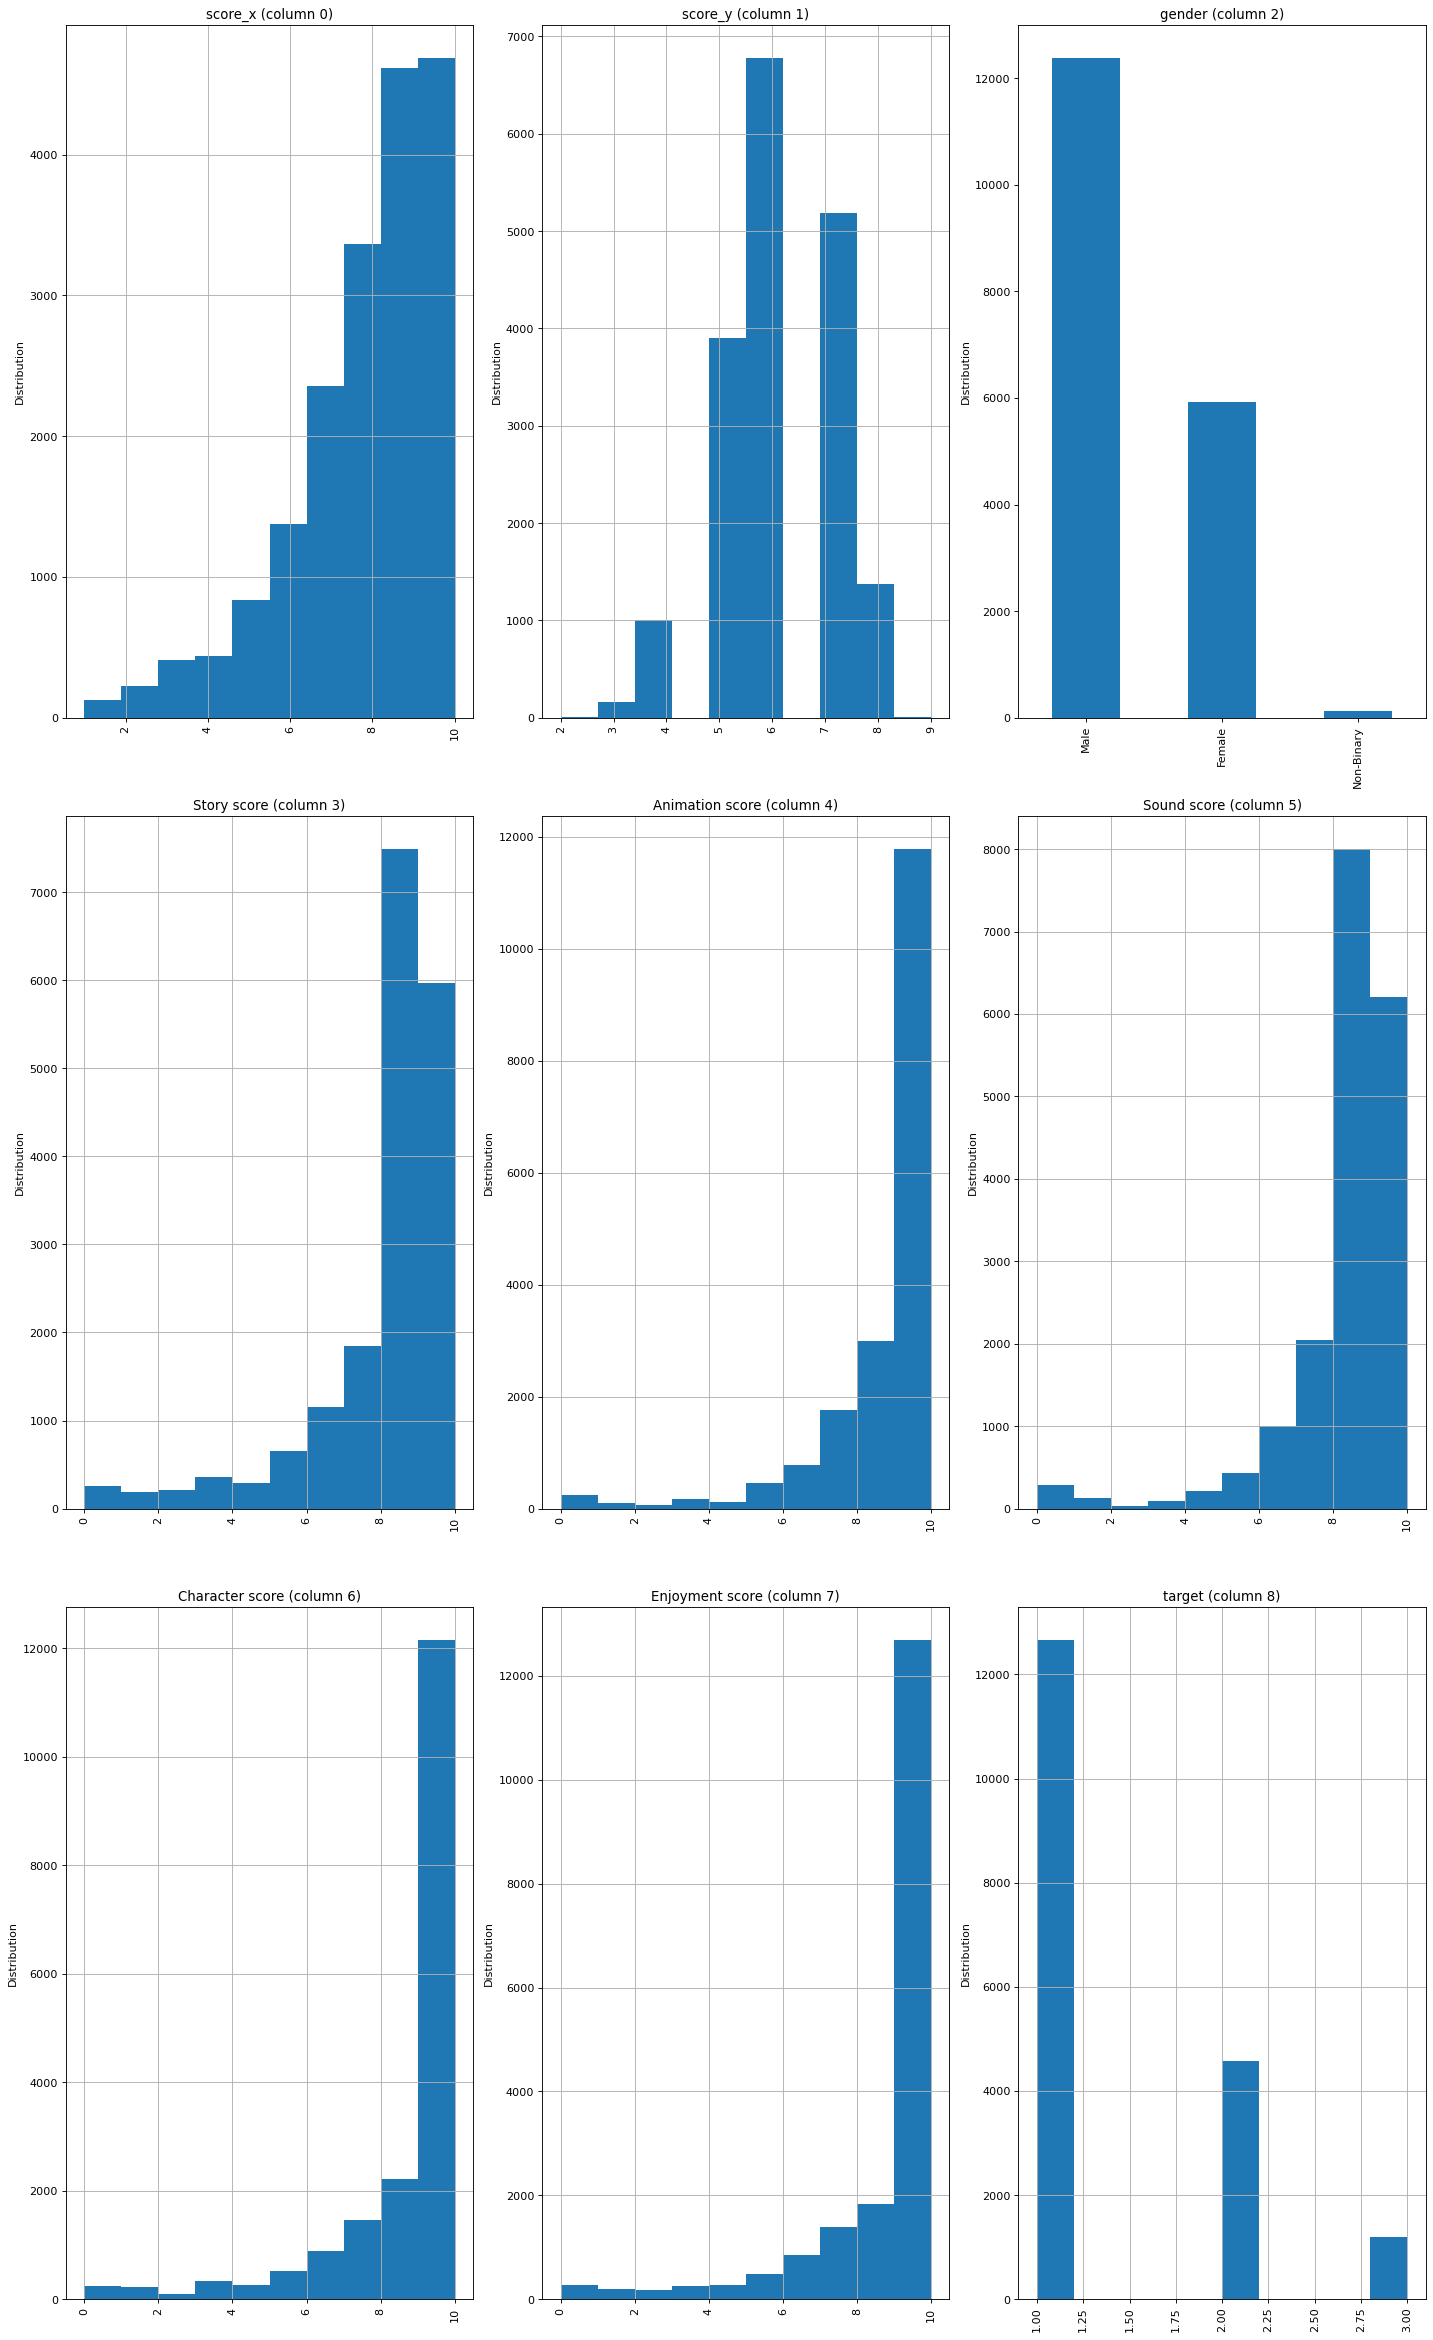

In [37]:
plotPerColumnDistribution(mergeddf, 25 ,3)

In [38]:
def partial_heatmap(data, start, stop):
    y = data['target']
    df = data.iloc[:, start:stop]
    sns.heatmap(df.corr(), annot=True, fmt='.2f')
    plt.show()

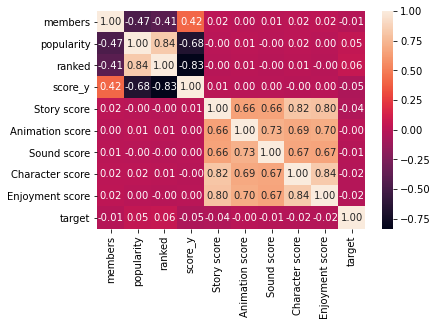

In [39]:
partial_heatmap(mergeddf, 10, 40)

count    18429.000000
mean         6.082641
std          1.048093
min          2.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: score_y, dtype: float64


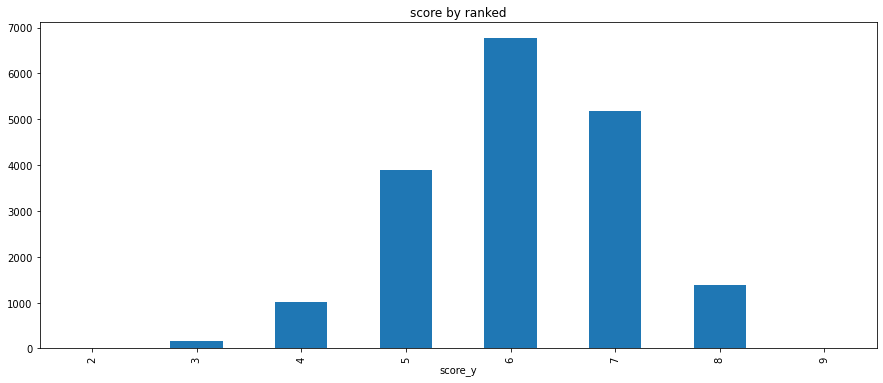

In [40]:
print(mergeddf['score_y'].describe()) 

# Number rating by rating year
mergeddf.groupby('score_y').count().popularity.plot(kind='bar', figsize=(15,6))
plt.title('score by ranked');

In [41]:
anime_pop = mergeddf[mergeddf.popularity!=0].sort_values(by='popularity').head(100).loc[:,['title','popularity','score_y']]
anime_pop.head()

,title,popularity,score_y
24035,Death Note,1.0,8
24034,Death Note,1.0,8
23661,Sword Art Online,3.0,7
23662,Sword Art Online,3.0,7
16775,One Punch Man,5.0,8


In [42]:
anime_genre = mergeddf.genre
anime_genre.head(100)

0        ['Slice of Life']
1        ['Slice of Life']
2        ['Slice of Life']
3        ['Slice of Life']
4       ['Kids', 'Sports']
              ...         
95    ['Action', 'Comedy']
96    ['Action', 'Comedy']
97    ['Action', 'Comedy']
98    ['Action', 'Comedy']
99    ['Action', 'Comedy']
Name: genre, Length: 100, dtype: object

In [43]:
genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)

In [44]:
genre_list[0:100]

["['Slice of Life']",
 "['Kids'",
 "'Sports']",
 "['Music'",
 "'Slice of Life'",
 "'Kids'",
 "'School']",
 "['Military'",
 "'Drama']",
 "['Demons'",
 "'Drama'",
 "'Fantasy'",
 "'Historical'",
 "'Magic'",
 "'Romance'",
 "'Samurai'",
 "'Supernatural']",
 "['Horror'",
 "'Supernatural'",
 "'Fantasy']",
 "['Ecchi'",
 "'Music']",
 "['Adventure'",
 "'Comedy']",
 "['Action'",
 "'Military'",
 "'Sci-Fi'",
 "'Space'",
 "'Mecha']",
 "['Slice of Life'",
 "['Kids']",
 "'Comedy'",
 "'Adventure'",
 "'Shounen']",
 "['Comedy'",
 "'Ecchi']",
 "['Comedy']",
 "['Fantasy'",
 "'Romance']",
 "'Demons'",
 "['Fantasy']",
 "['Sci-Fi']",
 "['Music']",
 "['Sports']",
 "['Supernatural']",
 "'Mystery'",
 "'Super Power']",
 "'Horror'",
 "'Seinen'",
 "'Vampire']",
 "'Kids']",
 "['Drama'",
 "'Harem'",
 "'Parody'",
 "'Josei'",
 "'Sci-Fi']",
 "'Parody']",
 "'Super Power'",
 "'Shoujo']",
 "'Mecha'",
 "'Ecchi'",
 "'Shounen'",
 "'Slice of Life']",
 "'Magic']",
 "['School'",
 "'Dementia']",
 "['Historical'",
 "['Seinen'",
 "

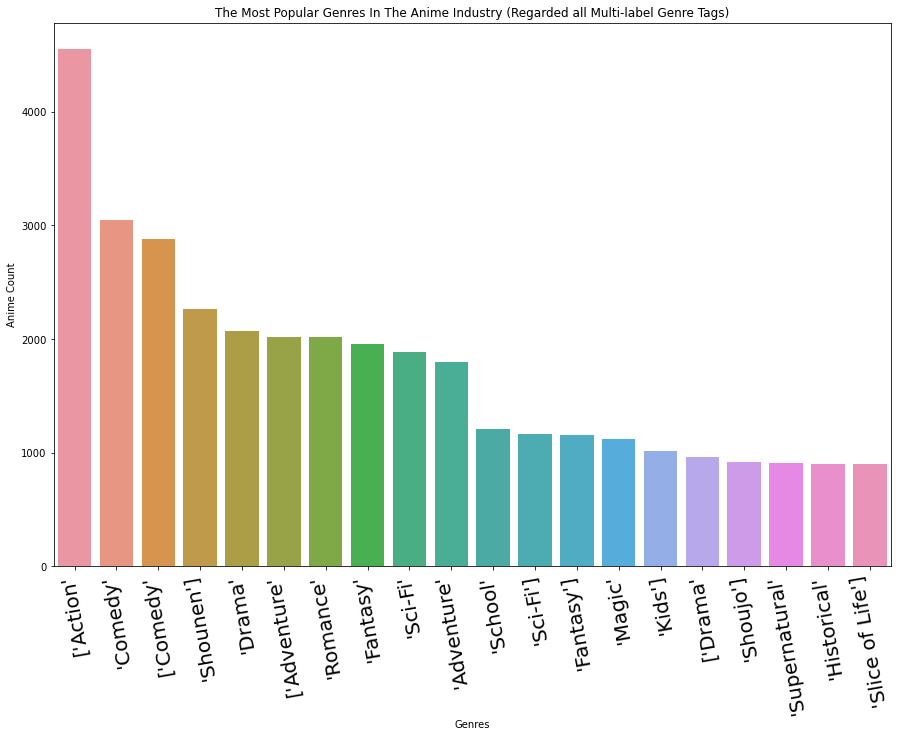

In [82]:
anime_genres_count = pd.Series(genre_splited).value_counts().head(20)

plt.figure(figsize=(15,10))
sns.barplot(x=anime_genres_count.index.tolist(), y=anime_genres_count.tolist())
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 100, fontsize=20) 
plt.show()

In [93]:
mergeddf['Magic']

0    16980
1     1449
Name: Magic, dtype: int64

In [47]:
for x in mergeddf['genre']:
    print(x.strip('][').replace("'",''))

Slice of Life
Slice of Life
Slice of Life
Slice of Life
Kids, Sports
Kids, Sports
Kids, Sports
Kids, Sports
Kids, Sports
Kids, Sports
Kids, Sports
Kids, Sports
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Music, Slice of Life, Kids, School
Military, Drama
Military, Drama
Military, Drama
Military, Drama
Military, Drama
Military, Drama
Military, Drama
Military, Drama
Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, Supernatural
Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, Supernatural
Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, Supernatural
Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, Supernatural
Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, Supernatural
Demons, Drama, Fantasy, Historic

Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Action, Adventure, Historical, Demons, Romance, Martial Arts, Fantasy
Comedy, Ecchi, Shounen, Sports
Comedy, Ecchi, Shounen, Sports
Comedy, Ecchi, Shounen, Sports
Comedy, Ecchi, Shounen, Sports
Comedy, Ecchi, Shounen, Sports
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
Fantasy, School
F

Music
Music
Music
Music
Music
Music
Comedy, Romance, Ecchi, School
Comedy, Romance, Ecchi, School
Comedy, Romance, Ecchi, School
Comedy, Kids
Comedy, Kids
Comedy, Kids
Action, Adventure, Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School
Action, Adventure, Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School
Action, Adventure, Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School
Action, Adventure, Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventure, Comedy, Magic, Fantasy, School
Adventur

Action, School, Sci-Fi, Super Power
Action, School, Sci-Fi, Super Power
Action, School, Sci-Fi, Super Power
Comedy, Dementia, Slice of Life
Comedy, Dementia, Slice of Life
Comedy, Dementia, Slice of Life
Comedy, Dementia, Slice of Life
Action, Drama, Sports
Action, Drama, Sports
Action, Drama, Sports
Action, Drama, Sports
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Action, Historical, Martial Arts, Samurai, Shounen
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Comedy, Kids, Magic, Military, Sci-Fi
Co

Adventure, Comedy, Fantasy, Slice of Life
Adventure, Comedy, Sports
Adventure, Comedy, Sports
Adventure, Comedy, Sports
Adventure, Comedy, Sports
Historical, Magic, Romance
Historical, Magic, Romance
Historical, Magic, Romance
Historical, Magic, Romance
Space, Dementia, Sci-Fi
Space, Dementia, Sci-Fi
Space, Dementia, Sci-Fi
Space, Dementia, Sci-Fi
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Action, Adventure, Fantasy
Action, Adventure, Fantasy
Action, Adventure, Fantasy
Action, Adventure, Fantasy
Dementia, Music
Dementia, Music
Dementia, Music
Dementia, Music
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Comedy, Magic, Fantasy
Game, Shounen, Supernatural
Game, Shounen, Supernatural
Game, Shounen, Supernatural
Game, Shounen, Supernatural
Comedy, Kids
Comedy, Kids
Comedy, Kids
Comedy, Kids
Adventure, Comedy
Adventure, Comedy
Adventure, Comedy
Adventure, Comedy
Action, Comedy, School, Shounen
Action, Comedy, School, Sh

Dementia
Dementia
Dementia
Dementia
Dementia
Dementia
Dementia
Dementia
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Kids, Drama
Adventure, Kids
Adventure, Kids
Adventure, Kids
Adventure, Kids
Adventure, Kids
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Magic, Fantasy, Shounen
Action, Mystery, Psychological, Drama, Ma

Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Horror, Demons
Comedy, Music
Comedy, Music
Comedy, Music
Comedy, Music
Comedy, Music
Comedy, Music
Comedy, Music
Comedy, Music
Fantasy
Fantasy
Fantasy
Fantasy
Drama, Sci-Fi, Seinen, Space
Drama, Sci-Fi, Seinen, Space
Drama, Sci-Fi, Seinen, Space
Drama, Sci-Fi, Seinen, Space
Adventure, Comedy, Fantasy, Shounen, Supernatural
Adventure, Comedy, Fantasy, Shounen, Supernatural
Adventure, Comedy, Fantasy, Shounen, Supernatural
Adventure, Comedy, Fantasy, Shounen, Supernatural
Mecha
Mecha
Mecha
Mecha
Action, Magic, Comedy, Super Power, Drama
Action, Magic, Comedy, Super Power, Drama
Action, Magic, Comedy, Super Power, Drama
Action, Magic, Comedy, Super Power, Drama
Comedy, Parody
Comedy, Parody
Comedy, Parody
Comedy, Parody
Ecchi, Fantasy, Game
Ecchi, Fantasy, Game
Ecchi, Fantasy, Game
Ecchi, Fantasy, Game
Ecchi, Fantasy, Game
Ecchi, Fantasy, Ga

Historical, Romance
Historical, Romance
Historical, Romance
Historical, Romance
Historical, Romance
Historical, Romance
Historical, Romance
Adventure, Music, Fantasy
Adventure, Music, Fantasy
Adventure, Music, Fantasy
Adventure, Music, Fantasy
Slice of Life, Kids, Drama
Slice of Life, Kids, Drama
Slice of Life, Kids, Drama
Slice of Life, Kids, Drama
Ecchi, Comedy
Ecchi, Comedy
Ecchi, Comedy
Ecchi, Comedy
Historical
Historical
Historical
Historical
Historical
Historical
Action, Adventure, Comedy, Mecha
Action, Adventure, Comedy, Mecha
Action, Adventure, Comedy, Mecha
Action, Adventure, Mecha, Sci-Fi
Action, Adventure, Mecha, Sci-Fi
Action, Adventure, Mecha, Sci-Fi
Comedy, Super Power
Comedy, Super Power
Comedy, Super Power
Comedy, Super Power
Action, Sci-Fi
Action, Sci-Fi
Action, Sci-Fi
Action, Sci-Fi
Slice of Life, Supernatural
Slice of Life, Supernatural
Slice of Life, Supernatural
Slice of Life, Supernatural
Slice of Life, Comedy
Slice of Life, Comedy
Slice of Life, Comedy
Slice of L

In [48]:
mergeddf['clean_genre'] = [x.strip('][').replace("'",'') for x in mergeddf['genre']]


In [49]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   score_x          18429 non-null  int32  
 4   scores           18429 non-null  object 
 5   title            18429 non-null  object 
 6   synopsis         18429 non-null  object 
 7   genre            18429 non-null  object 
 8   aired            18429 non-null  object 
 9   episodes         18429 non-null  float64
 10  members          18429 non-null  float64
 11  popularity       18429 non-null  float64
 12  ranked           18429 non-null  float64
 13  score_y          18429 non-null  int32  
 14  gender           18429 non-null  object 
 15  birthday         18429 non-null  object 
 16  favorites_anime  18429 non-null  object 
 17  Story score 

In [50]:
list_of_unique_values =' '.join(mergeddf.clean_genre.unique())
list_of_unique_values = list_of_unique_values.replace(' ',',')
list_of_unique_genres = list_of_unique_values.split(",")
list_of_unique_genres = sorted(list(set(list_of_unique_genres)))
list_of_unique_genres

['',
 'Action',
 'Adventure',
 'Ai',
 'Arts',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Life',
 'Magic',
 'Martial',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Power',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shounen',
 'Slice',
 'Space',
 'Sports',
 'Super',
 'Supernatural',
 'Thriller',
 'Vampire',
 'of']

In [84]:
mergeddf['Action'] = [1 if 'Action' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Adventure'] = [1 if 'Adventure' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Ai'] = [1 if 'Ai' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Arts'] = [1 if 'Arts' or 'Martial' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Cars'] = [1 if 'Cars' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Comedy'] = [1 if 'Comedy' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Dementia'] = [1 if 'Dementia' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Demons'] = [1 if 'Demons' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Drama'] = [1 if 'Drama' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Ecchi'] = [1 if 'Ecchi' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Fantasy'] = [1 if 'Fantasy' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Game'] = [1 if 'Game' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Harem'] = [1 if 'Harem' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Historical'] = [1 if 'Historical' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Horror'] = [1 if 'Horror' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Josei'] = [1 if 'Josei' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Kids'] = [1 if 'Kids' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Life'] = [1 if 'Life' or 'Slice' or 'of' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Magic'] = [1 if 'Magic' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Mecha'] = [1 if 'Mecha' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Military'] = [1 if 'Military' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Music'] = [1 if 'Music' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Mystery'] = [1 if 'Mystery' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Parody'] = [1 if 'Parody' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Police'] = [1 if 'Police' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Power'] = [1 if 'Power' or 'Super' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Psychological'] = [1 if 'Psychological' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Romance'] = [1 if 'Romance' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Samurai'] = [1 if 'Samurai' in genre else 0 for genre in mergeddf['genre']]
mergeddf['School'] = [1 if 'School' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Sci-Fi'] = [1 if 'Sci-Fi' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Seinen'] = [1 if 'Seinen' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Shouju'] = [1 if 'Shouju' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Shounen'] = [1 if 'Shounen' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Space'] = [1 if 'Space' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Sports'] = [1 if 'Sports' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Supernatural'] = [1 if 'Supernatural' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Thriller'] = [1 if 'Thriller' in genre else 0 for genre in mergeddf['genre']]
mergeddf['Vampire'] = [1 if 'Vampire' in genre else 0 for genre in mergeddf['genre']]

In [85]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   uid              18429 non-null  float64       
 1   profile          18429 non-null  object        
 2   anime_uid        18429 non-null  float64       
 3   score_x          18429 non-null  int32         
 4   scores           18429 non-null  object        
 5   title            18429 non-null  object        
 6   synopsis         18429 non-null  object        
 7   genre            18429 non-null  object        
 8   aired            18429 non-null  object        
 9   episodes         18429 non-null  float64       
 10  members          18429 non-null  float64       
 11  popularity       18429 non-null  float64       
 12  ranked           18429 non-null  float64       
 13  score_y          18429 non-null  int32         
 14  gender           18429 non-null  objec

## OHE and SMOTE
one hot encoding object columns and using smote for the imbalanace of the target column 

In [53]:
# Defined a OneHotEncoder function for ease of access
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
    
    # Reset indices to avoid merging conflicts
    x_train_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
    
    # Joined the OHE dataframe to the dataframe that is passed into the function
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df
def confusion_and_metrics(model, X_test, y_test):
    # Accuracy Score
    print(f"Accuracy Score: {model.score(X_test, y_test):.3f}")
    
    
    # Plot confusion matrix for visualization
    plot_confusion_matrix(model, X_test, y_test);
# Defined a function to take in column name and output log-odds coefficient and generate odds value.
def print_odds(dataframe, column_name):
    # Prints out the name of the column and it's original log_odds value
    print(f"{column_name}: {dataframe[column_name][0]}")
    
    # Prints out the odds value of the column
    print(f"Odds: {np.exp(dataframe[column_name][0])}")

In [54]:
X = mergeddf.drop(['target', 'profile','clean_genre', 'birthday','uid', 'genre', 'anime_uid','scores','synopsis','score_x','title','aired','favorites_anime'], axis=1)
y = mergeddf['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [56]:
# Called the OHE function we made and assigned new dataframe variables
train_ohe = OHE(X_train, ['gender'])
test_ohe = OHE(X_test, ['gender'])
train_ohe

,episodes,members,popularity,ranked,score_y,Story score,Animation score,Sound score,Character score,Enjoyment score,...,Shouju,Shounen,Space,Sports,Supernatural,Thriller,Vampire,gender_Female,gender_Male,gender_Non-Binary
0,23.0,98110.0,1115.0,2921.0,7,10,8,9,9,10,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,12.0,2611.0,7330.0,8649.0,5,8,9,8,9,9,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,6.0,22001.0,3043.0,3668.0,7,8,8,8,7,6,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,1.0,176401.0,619.0,459.0,8,9,10,10,10,10,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,14.0,2425.0,7480.0,3872.0,6,8,9,8,9,9,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,72.0,2148.0,7834.0,637.0,7,8,8,7,9,10,...,0,1,0,0,0,0,0,0.0,1.0,0.0
13817,1.0,200.0,13386.0,11640.0,5,10,10,10,10,10,...,0,0,0,0,0,0,0,1.0,0.0,0.0
13818,1.0,243.0,12779.0,9733.0,5,8,7,9,7,8,...,0,0,0,0,0,0,0,0.0,1.0,0.0
13819,1.0,77.0,15805.0,14574.0,5,7,10,9,7,6,...,0,0,0,0,0,0,0,0.0,1.0,0.0


In [57]:
train_ohe.columns

Index(['episodes', 'members', 'popularity', 'ranked', 'score_y', 'Story score',
       'Animation score', 'Sound score', 'Character score', 'Enjoyment score',
       'Action', 'Adventure', 'Ai', 'Arts', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical',
       'Horror', 'Josei', 'Kids', 'Life', 'Magic', 'Martial', 'Mecha',
       'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Power',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shouju', 'Shounen', 'Space', 'Sports', 'Supernatural', 'Thriller',
       'Vampire', 'gender_Female', 'gender_Male', 'gender_Non-Binary'],
      dtype='object')

In [58]:
y_train.value_counts()

1    9489
2    3425
3     907
Name: target, dtype: int64

In [59]:
y_test.value_counts()

1    3174
2    1143
3     291
Name: target, dtype: int64

In [60]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

smote=SMOTE('not minority')
X_smote, y_smote = smote.fit_sample(train_ohe, y_train)
X_test_smote, y_test_smote = smote.fit_sample(test_ohe, y_test)

counter = Counter(y_train)
test_counter = Counter(y_test_smote)
print(counter)
print(test_counter)

C:\Users\ilene\anaconda3\envs\learn-env\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=not minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Counter({1: 9489, 2: 3425, 3: 907})
Counter({1: 3174, 2: 3174, 3: 291})


## Dummy Model

In [61]:
# Created Dummy Classifier model to look at simple accuracy score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
y_test_pred = dummy.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
dummy.score(X_test, y_test)

0.3352864583333333

Accuracy Score: 0.326


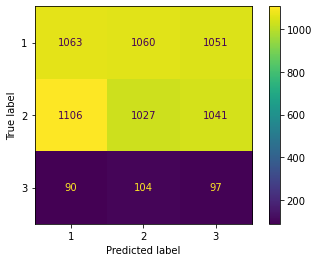

In [62]:
confusion_and_metrics(dummy, X_test_smote, y_test_smote)

In [63]:
print(X_smote.shape)
print(y_smote.shape)

(19885, 53)
(19885,)


## First model

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier (random_state = 10)
dt.fit(X_smote, y_smote)
dt.score(X_test_smote, y_test_smote)

0.9108299442687152

Accuracy Score: 0.911


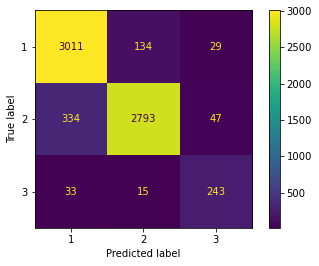

In [65]:
confusion_and_metrics(dt, X_test_smote, y_test_smote)

## Second model

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000,multi_class='multinomial', solver='lbfgs')
model.fit(X_smote, y_smote)
model.score(X_test_smote, y_test_smote)

0.49269468293417684

Accuracy Score: 0.493


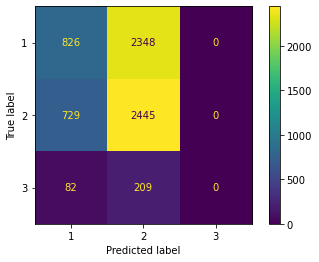

In [67]:
confusion_and_metrics(model, X_test_smote, y_test_smote)

In [68]:
y_smote.value_counts()

2    9489
1    9489
3     907
Name: target, dtype: int64

In [69]:
# Extracting column names into a dictionary
model_column_names = {c: i for i, c in enumerate(X_smote.columns)}

# Flipping the column keys and values
model_column_names_flipped = {model_column_names[k]:k for k in model_column_names}

# Turning the coefficients array into a dataframe
model_coef = pd.DataFrame(model.coef_)

model_coef.rename(model_column_names_flipped, axis = 1, inplace = True)
# Checking to see if the rename was done correctly
model_coef.columns

Index(['episodes', 'members', 'popularity', 'ranked', 'score_y', 'Story score',
       'Animation score', 'Sound score', 'Character score', 'Enjoyment score',
       'Action', 'Adventure', 'Ai', 'Arts', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical',
       'Horror', 'Josei', 'Kids', 'Life', 'Magic', 'Martial', 'Mecha',
       'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Power',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shouju', 'Shounen', 'Space', 'Sports', 'Supernatural', 'Thriller',
       'Vampire', 'gender_Female', 'gender_Male', 'gender_Non-Binary'],
      dtype='object')

In [70]:
model_coef

,episodes,members,popularity,ranked,score_y,Story score,Animation score,Sound score,Character score,Enjoyment score,...,Shouju,Shounen,Space,Sports,Supernatural,Thriller,Vampire,gender_Female,gender_Male,gender_Non-Binary
0,1.127255e-06,0.000006,0.000074,0.000004,6.231964e-07,8.564237e-07,7.518742e-07,7.508726e-07,8.443645e-07,8.096827e-07,...,0.0,6.163370e-08,1.828215e-08,3.066308e-08,2.807796e-08,-1.865993e-09,3.396367e-09,7.833151e-08,1.448481e-08,-1.126559e-08
1,-9.483706e-07,0.000006,0.000057,0.000028,5.898136e-08,-8.428504e-08,5.056968e-08,3.614182e-08,-4.668237e-08,1.372702e-08,...,0.0,-3.783736e-08,-1.024056e-08,-2.441025e-08,-1.853728e-08,1.786172e-09,-1.423293e-09,-3.737043e-08,4.063195e-08,1.095845e-08
2,-1.788848e-07,-0.000013,-0.000131,-0.000032,-6.821777e-07,-7.721387e-07,-8.024439e-07,-7.870144e-07,-7.976821e-07,-8.234097e-07,...,0.0,-2.379634e-08,-8.041591e-09,-6.252833e-09,-9.540680e-09,7.982128e-11,-1.973074e-09,-4.096109e-08,-5.511676e-08,3.071353e-10


[0.05994105 0.08307788 0.08630215 0.08757468 0.0509342  0.04053281
 0.03792235 0.03963979 0.03909083 0.03749704 0.0181102  0.01780254
 0.00343918 0.00374716 0.00217704 0.02597717 0.0055393  0.00734397
 0.01903361 0.01079289 0.02276481 0.00475536 0.00522613 0.01323715
 0.00780237 0.00207925 0.01577758 0.         0.0126158  0.00370223
 0.01100865 0.00824431 0.01411091 0.0119493  0.00882164 0.00489036
 0.         0.00730449 0.01452777 0.0036701  0.01410621 0.01538697
 0.01302976 0.         0.01671344 0.00801493 0.00828349 0.01297911
 0.00293205 0.00324514 0.02766508 0.02568346 0.00299632]


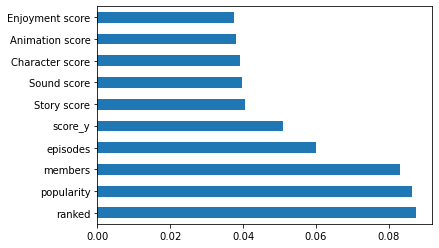

In [71]:
# Feature columns
X = X_smote
# Target column - H1N1 Knowledge
y = y_smote

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Instantiate model
modelfeatures = ExtraTreesClassifier()
modelfeatures.fit(X,y)
print(modelfeatures.feature_importances_) # use built in class 'feature_importances' of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfeatures.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [110]:
df_new = mergeddf[['Action', 'target']]
df_new.value_counts()

Action  target
0       1         9364
        2         3518
1       1         3299
        2         1050
0       3          942
1       3          256
dtype: int64

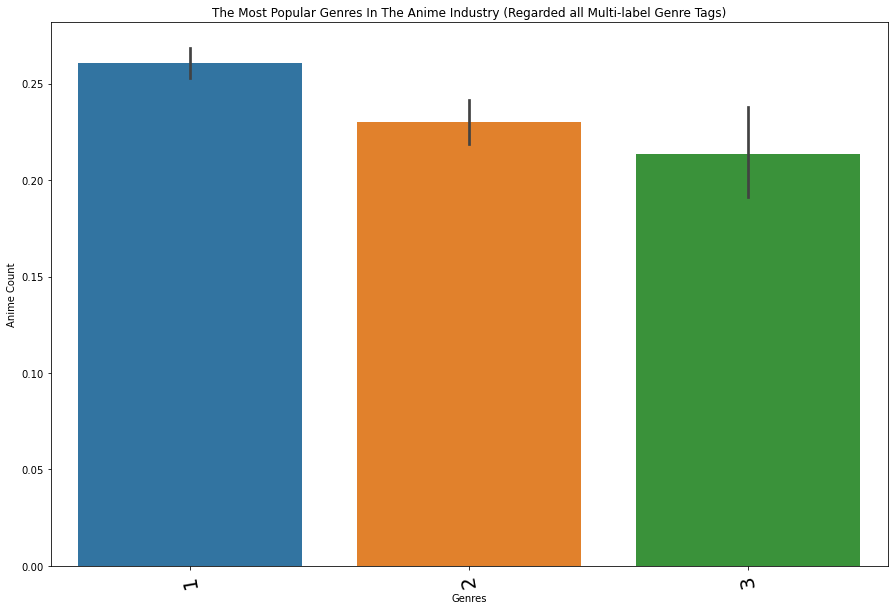

In [112]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_new['target'], y=df_new['Action'])
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 100, fontsize=20) 
plt.show()

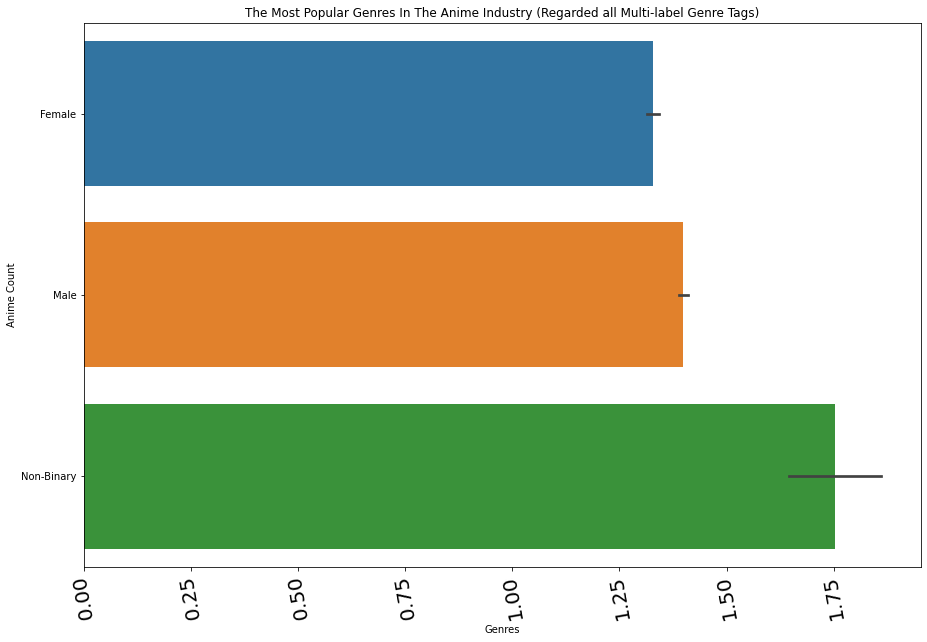

In [114]:
plt.figure(figsize=(15,10))
sns.barplot(x=mergeddf['target'], y=mergeddf['gender'])
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 100, fontsize=20) 
plt.show()

In [74]:
import datetime

In [75]:
mergeddf['birthday'] = pd.to_datetime(mergeddf['birthday'], errors = 'coerce')
#mergeddf=mergeddf[mergedd#.notn]

birth_date = mergeddf.birthday
gender = mergeddf.gender
#spent = users.user_days_spent_watching
 
age = []
for each in birth_date:
    age.append(round((datetime.datetime.now()-each).days/365.25,1))

In [76]:
mergeddf['age'] = age
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   uid              18429 non-null  float64       
 1   profile          18429 non-null  object        
 2   anime_uid        18429 non-null  float64       
 3   score_x          18429 non-null  int32         
 4   scores           18429 non-null  object        
 5   title            18429 non-null  object        
 6   synopsis         18429 non-null  object        
 7   genre            18429 non-null  object        
 8   aired            18429 non-null  object        
 9   episodes         18429 non-null  float64       
 10  members          18429 non-null  float64       
 11  popularity       18429 non-null  float64       
 12  ranked           18429 non-null  float64       
 13  score_y          18429 non-null  int32         
 14  gender           18429 non-null  objec

In [79]:
mergeddf[['age']] = mergeddf[['age']].fillna(mergeddf[['age']].median())
mergeddf['age'].value_counts()

32.7    3999
33.3     918
33.4     516
32.3     463
30.7     267
        ... 
90.1       1
14.2       1
46.6       1
12.3       1
50.1       1
Name: age, Length: 253, dtype: int64

In [81]:
mergeddf['age'] = mergeddf['age'].astype(int)
mergeddf['age']

0        31
1        31
2        31
3        31
4        37
         ..
25775    27
25776    32
25777    31
25778    31
25780    28
Name: age, Length: 18429, dtype: int32

## Conclusion

## Recommendations 

## Future considerations